In [50]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
import shap
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('../data/train_concat.csv')
valid = pd.read_csv('../data/valid_concat.csv')
test = pd.read_csv('../data/test_concat.csv')

In [3]:
print(train.columns)
print(valid.columns)
print(test.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')


In [4]:
print(train.shape)
print(valid.shape)
print(test.shape)

(18513, 25)
(1233, 25)
(4938, 25)


In [27]:
train['group'] = train["group"].astype("category")
train.info()
valid['group'] = valid["group"].astype("category")
test['group'] = test["group"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18513 entries, 0 to 18512
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              18513 non-null  float64 
 1   sex              18513 non-null  int64   
 2   HTN              18513 non-null  int64   
 3   DM               18513 non-null  int64   
 4   plt              17208 non-null  float64 
 5   tpro             18513 non-null  float64 
 6   alb              18513 non-null  float64 
 7   bun              18513 non-null  float64 
 8   cr               18513 non-null  float64 
 9   eGFR             18513 non-null  float64 
 10  blood_dip        18513 non-null  float64 
 11  protein_dip      18513 non-null  float64 
 12  acr_urine        13761 non-null  float64 
 13  pcr_urine        18513 non-null  float64 
 14  glu              18510 non-null  float64 
 15  glu_urine        18513 non-null  float64 
 16  esterase_urine   18513 non-null  float64

In [38]:
train_dum = pd.get_dummies(train, columns = ['group'],drop_first=True).copy()
valid_dum = pd.get_dummies(valid, columns = ['group'],drop_first=True).copy()
test_dum = pd.get_dummies(test, columns = ['group'],drop_first=True).copy()

### EDA

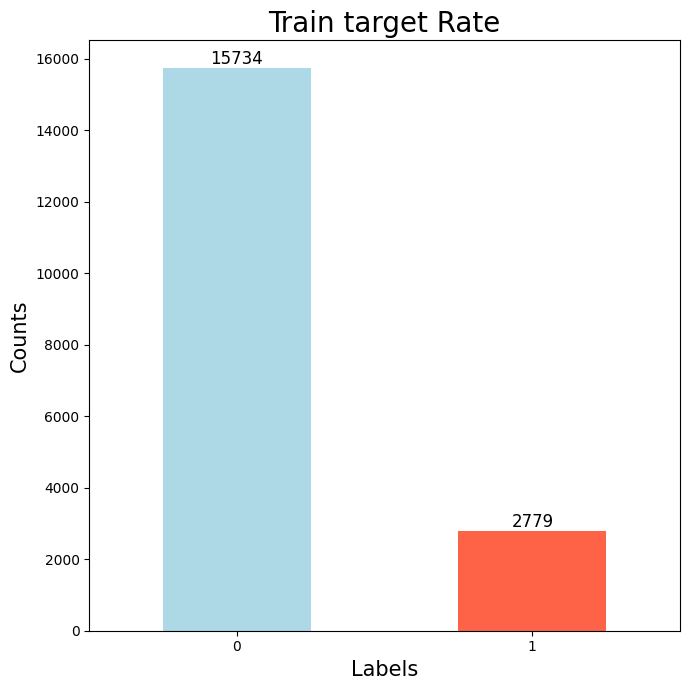

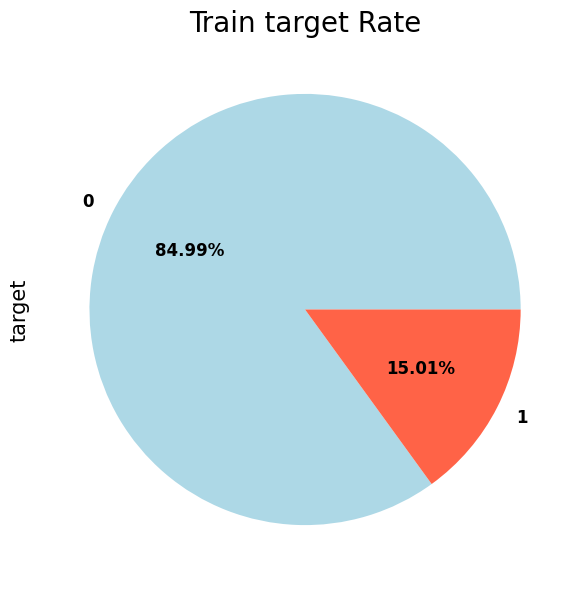

In [91]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('Train target Rate', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

# Get the value counts of 'target' and plot as a bar plot
train['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(train['target'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('Train target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

train['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

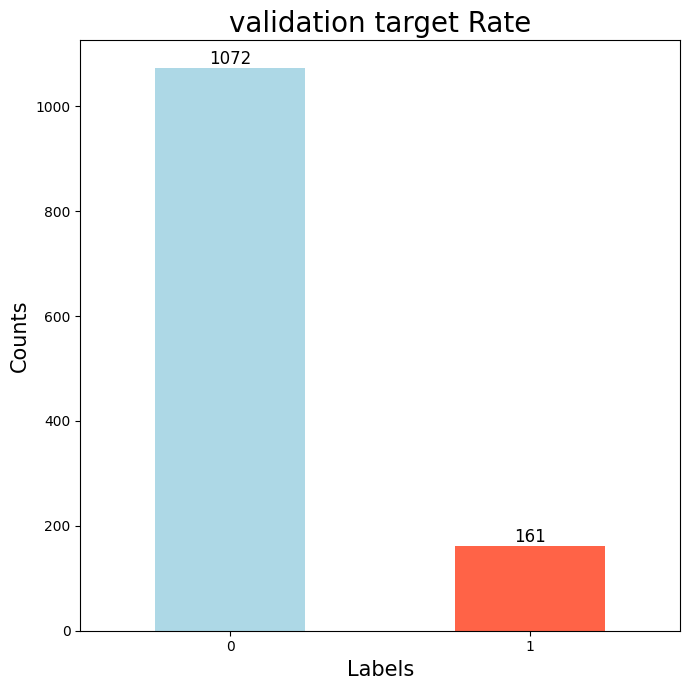

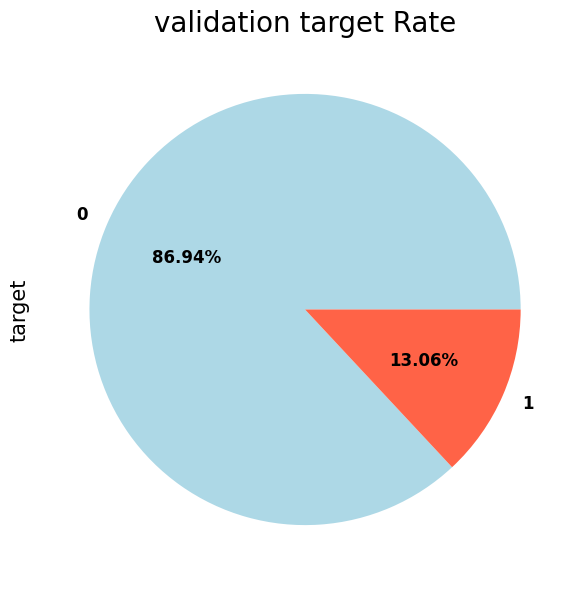

In [90]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('validation target Rate', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

valid['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(valid['target'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('validation target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

valid['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

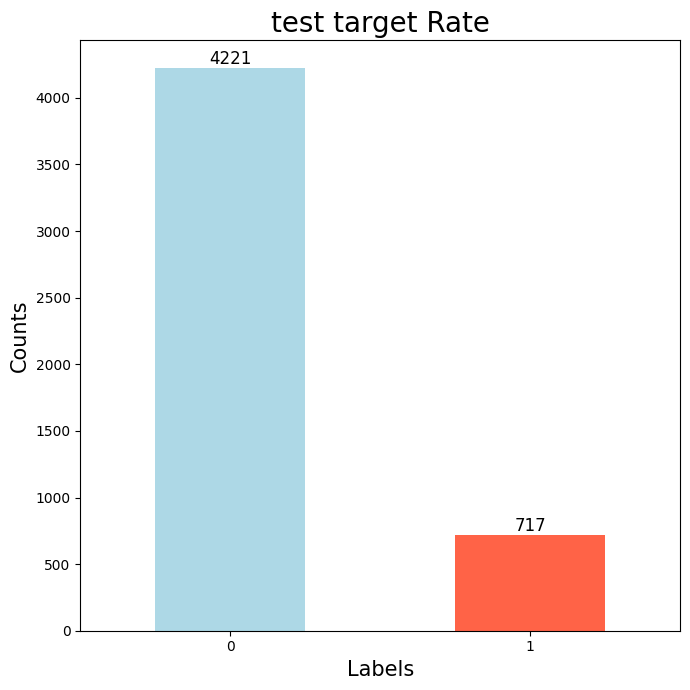

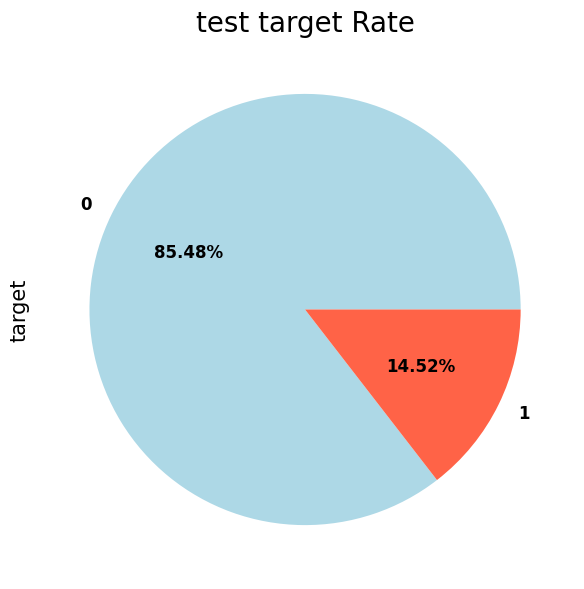

In [89]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('test target Rate', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

test['target'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(test['target'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('test target Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

test['target'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

## Modeling

In [21]:
xgb = XGBClassifier(random_state = 2023, enable_categorical=True, tree_method = 'hist',n_jobs=-1)

In [39]:
X_train = train_dum.drop(['target', 'RBC_binary', 'WBC_binary'], axis=1).copy()
y_train = train_dum['target'].copy()

X_valid = valid_dum.drop(['target', 'RBC_binary', 'WBC_binary'], axis=1).copy()
y_valid = valid_dum['target'].copy()

X_test = test_dum.drop(['target', 'RBC_binary', 'WBC_binary'], axis=1).copy()
y_test = test_dum['target'].copy()

In [40]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2023, ...)

In [41]:
y_valid

0       0
1       0
2       0
3       1
4       0
       ..
1228    1
1229    0
1230    1
1231    0
1232    0
Name: target, Length: 1233, dtype: int64

## Shap

In [42]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
# # Create a KernelExplainer
# explainer = shap.KernelExplainer(model=xgb.predict_proba, data=X_train)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X_test)

# # Visualize the SHAP values or use them for further analysis
# shap.summary_plot(shap_values, X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


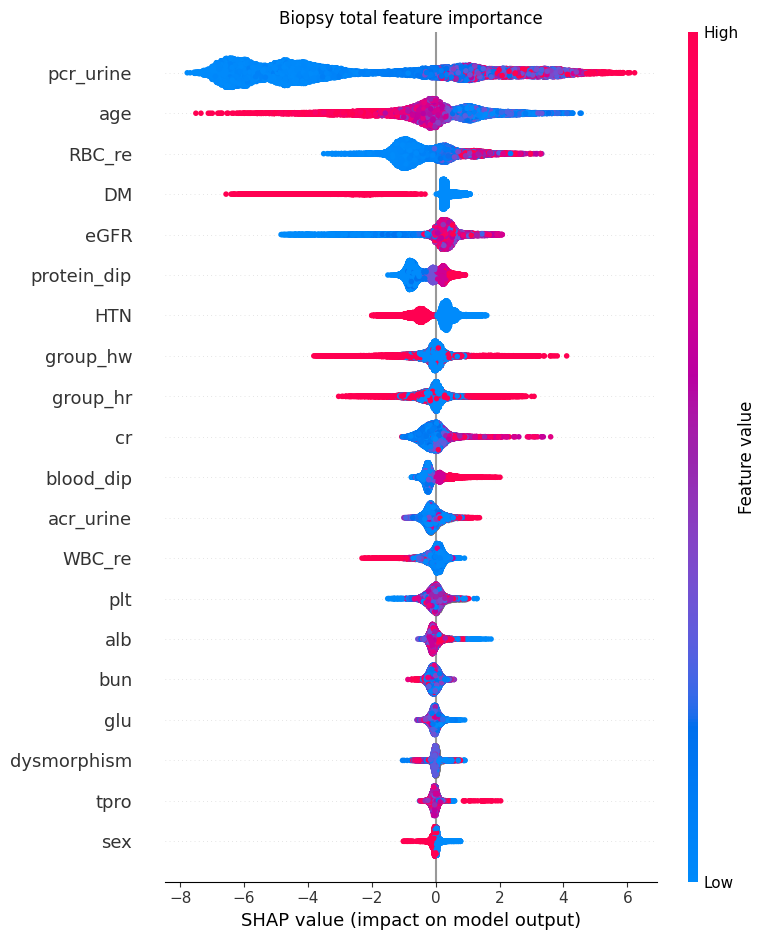

In [45]:
plt.figure(figsize=[10,10])

plt.title('Biopsy total feature importance')
shap.summary_plot(shap_values, X_train)

plt.show()

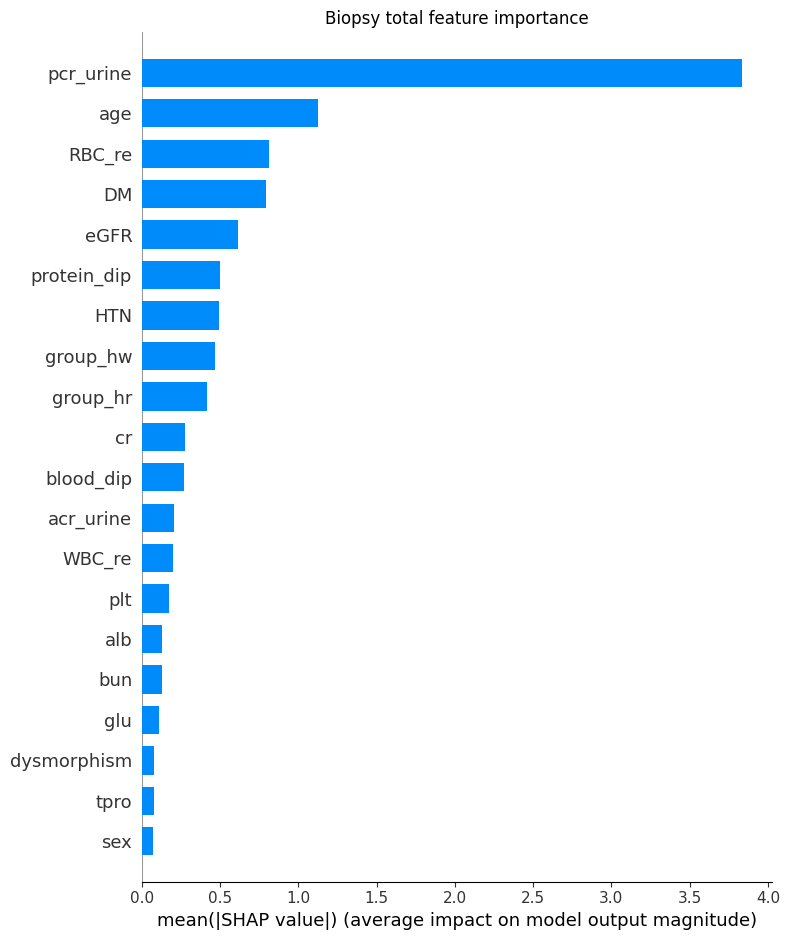

In [44]:
plt.figure(figsize=[10,10])

plt.title('Biopsy total feature importance')
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.show()

In [46]:
train_pred = xgb.predict(X_train)
train_pred_prob = xgb.predict_proba(X_train)

In [54]:
train_pred_prob

array([[1.0065037e-01, 8.9934963e-01],
       [9.9995196e-01, 4.8025046e-05],
       [9.9996614e-01, 3.3873821e-05],
       ...,
       [9.9905527e-01, 9.4473647e-04],
       [6.0910881e-01, 3.9089122e-01],
       [9.3086255e-01, 6.9137432e-02]], dtype=float32)

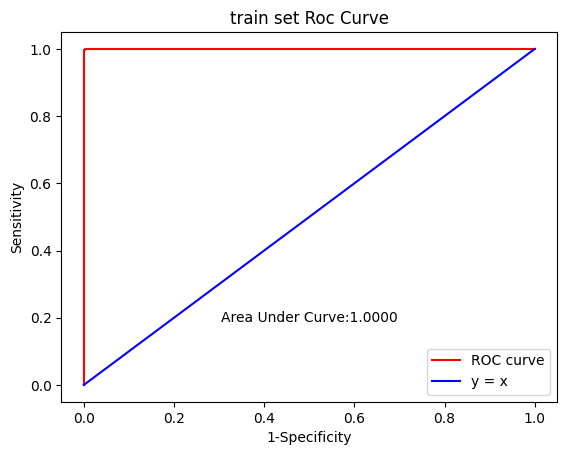

In [55]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_train), train_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_train), train_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [71]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15734
           1       1.00      0.99      1.00      2779

    accuracy                           1.00     18513
   macro avg       1.00      1.00      1.00     18513
weighted avg       1.00      1.00      1.00     18513



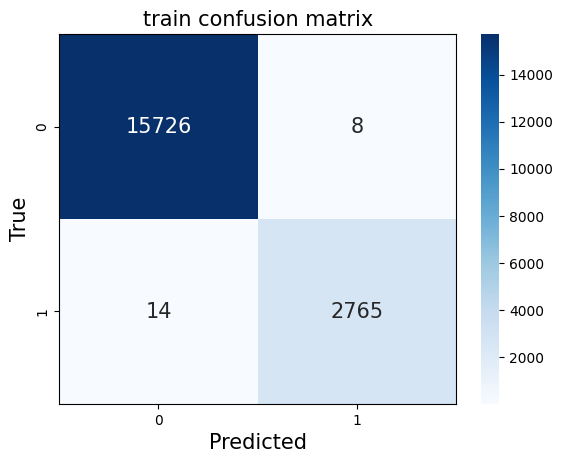

In [57]:
cm = confusion_matrix(y_train, train_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

## Validation

In [78]:
pred = xgb.predict(X_valid)
print(pd.DataFrame(pred).head())

pred_prob = xgb.predict_proba(X_valid)
print(pd.DataFrame(pred_prob[:,1]).head())

   0
0  0
1  0
2  0
3  1
4  0
          0
0  0.000010
1  0.001426
2  0.000004
3  0.897044
4  0.000108


In [79]:
pred_prob.shape

(1233, 2)

In [60]:
y_valid

0       0
1       0
2       0
3       1
4       0
       ..
1228    1
1229    0
1230    1
1231    0
1232    0
Name: target, Length: 1233, dtype: int64

In [80]:
accuracy = accuracy_score(y_valid, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.76%


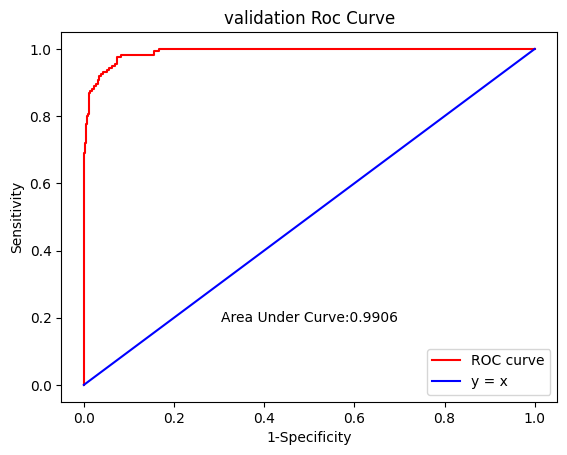

In [81]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_valid), pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_valid), pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('validation Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [63]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1072
           1       0.87      0.88      0.88       161

    accuracy                           0.97      1233
   macro avg       0.93      0.93      0.93      1233
weighted avg       0.97      0.97      0.97      1233



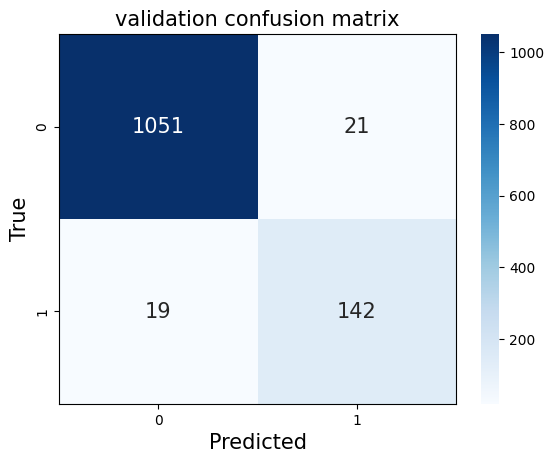

In [65]:
cm = confusion_matrix(y_valid, pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

#### test

In [82]:
test_pred = xgb.predict(X_test)
test_pred_prob = xgb.predict_proba(X_test)

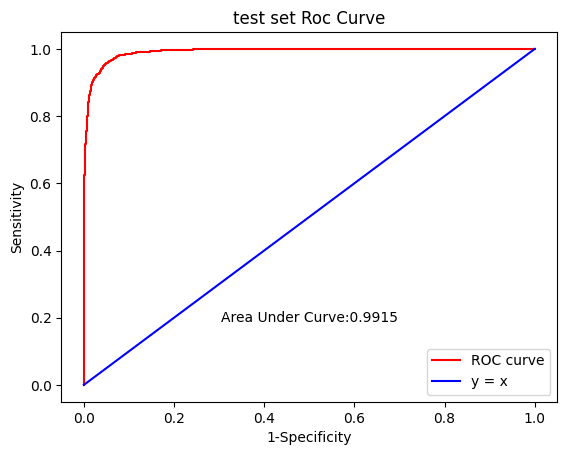

In [83]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_test), test_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_test), test_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [84]:
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.98%


In [85]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4221
           1       0.90      0.89      0.89       717

    accuracy                           0.97      4938
   macro avg       0.94      0.93      0.94      4938
weighted avg       0.97      0.97      0.97      4938



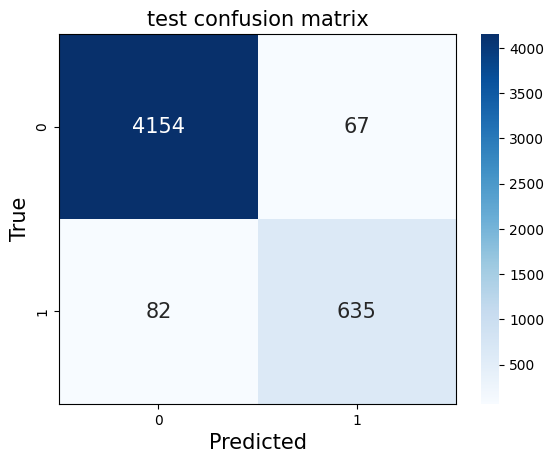

In [86]:
cm = confusion_matrix(y_test, test_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### 비교하기

In [29]:
tt = pd.read_csv('../data/test.csv')
vv = pd.read_csv('../data/validation.csv')

In [30]:
print(tt['hk_proba'])
print(vv['hk_proba'])

0       0.962302
1       0.021136
2       0.996249
3       0.999645
4       0.992675
          ...   
1641    0.959380
1642    0.999774
1643    0.993206
1644    0.995147
1645    0.979208
Name: hk_proba, Length: 1646, dtype: float64
0      0.998615
1      0.652203
2      0.999705
3      0.078725
4      0.998814
         ...   
406    0.006996
407    0.940380
408    0.210982
409    0.917464
410    0.813756
Name: hk_proba, Length: 411, dtype: float64


In [31]:
print(pd.DataFrame(test_pred_prob[:,0]))
print(pd.DataFrame(pred_prob[:,0]))

             0
0     0.995213
1     0.013897
2     0.999905
3     0.999983
4     0.999895
...        ...
1641  0.999740
1642  0.999996
1643  0.999856
1644  0.999879
1645  0.998084

[1646 rows x 1 columns]
            0
0    0.999994
1    0.675745
2    0.999997
3    0.013117
4    0.999560
..        ...
406  0.005170
407  0.910760
408  0.403176
409  0.998016
410  0.995050

[411 rows x 1 columns]
